<a href="https://colab.research.google.com/github/AvinashKumar0210/Tasks/blob/main/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LEVEL 1**

# **TASK 1 : Top Cuisines**
1. Determine the top three most cuisines in the dataset.
2. Calculate the percentage of restaurants that serve each of the top cuisines.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/Dataset .csv")
df_head = df.head()
df_info = df.info()
df_describe = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
#Calculating average cost for two columns
avg_cost = df['Average Cost for two'].mean()+ 3*df['Average Cost for two'].std()
print(avg_cost)

49562.75998376979


In [ ]:
Top_Cuisines = df['Cuisines'].value_counts().head(3)
print("Top three most common Cuisines : ",Top_Cuisines)

Top three most common Cuisines :  Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


**Calculating the percentage of restaurants that serves each of the top cuisines.**

In [ ]:
top_restaurants = len(df[df['Cuisines'].isin(Top_Cuisines.index)])
print("Total number of restaurants : ",top_restaurants)

Total number of restaurants :  1801


In [ ]:
percentage_top_cuisines = (Top_Cuisines/top_restaurants)*100
print("Percentage of restaurants serving top cuisines : ",percentage_top_cuisines)

Percentage of restaurants serving top cuisines :  Cuisines
North Indian             51.971127
North Indian, Chinese    28.373126
Chinese                  19.655747
Name: count, dtype: float64


## **Task 2 : City Analysis**
1. Identify the city with the highest number of restaurants in the dataset.
2. Calculate the average rating for restaurants in each city.
3. Determine the city with the highest average ratings.

In [ ]:
#Count the number of restaurants in each city.
city_restaurant_counts = df['City'].value_counts()
print("Number of restaurants in each city : ",city_restaurant_counts)

Number of restaurants in each city :  City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64


In [ ]:
#Identify the city with the highest number of restaurants.
city_with_highest_restaurants = df['City'].value_counts().idxmax()
print("City with the highest number of restaurants : ",city_with_highest_restaurants)
num_of_restaurants = df['City'].value_counts().max()
print("Number of restaurants in the city : ",num_of_restaurants)

City with the highest number of restaurants :  New Delhi
Number of restaurants in the city :  5473


In [ ]:
#Calculate the average rating for restaurants in each city
average_rating_per_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average rating for restaurants in each city : ",average_rating_per_city)

Average rating for restaurants in each city :  City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


In [ ]:
#Identify the city with the highest average rating
city_with_highest_avg_rating = average_rating_per_city.idxmax()
print("City with the highest average rating : ",city_with_highest_avg_rating)
highest_avg_rating = average_rating_per_city.max()
print("Highest average rating : ",highest_avg_rating)

City with the highest average rating :  Inner City
Highest average rating :  4.9


## **Task 3 : Price Range Distribution**
1. Create a histogram or bar chart to visualize the distribution of price range among the restaurants.
2. Calculate the percentage of restaurants in each price range category.

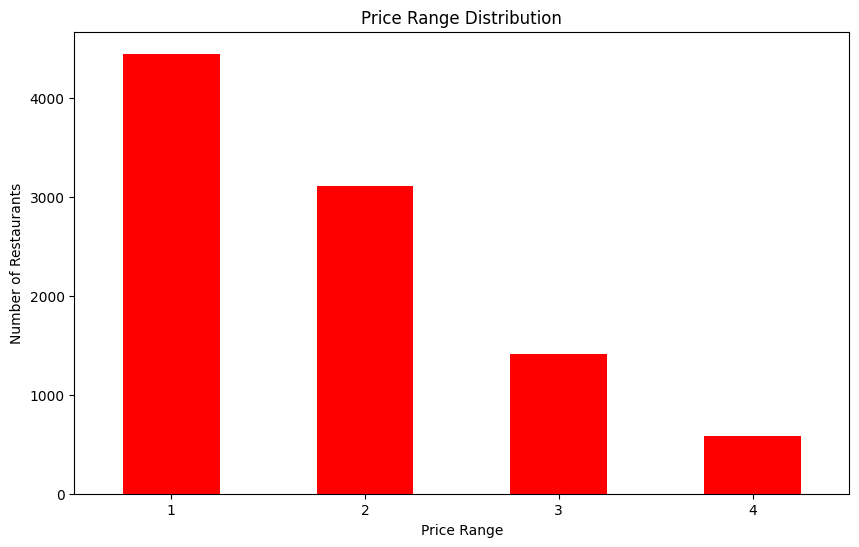

In [ ]:
# Create a bar chart for the price range distribution.
price_range_counts = df['Price range'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', title='Price Range Distribution',color='red')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Calculate the percentage of restaurants in each price range category
total_restaurants = len(df)
price_range_percentages = (price_range_counts / total_restaurants) * 100
print("Percentage of restaurants in each price range category : ",price_range_percentages)

Percentage of restaurants in each price range category :  Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


## **Task 4 : Online Delivery**
1. Determine the percentage of the retaurants that offers online delivery.
2.  Compare average ratings of restaurants with or without online delivery.

In [ ]:
#Calculate the percentage of the restaurants that offers online delivery.
online_delivery_restaurants = df[df['Has Online delivery'] == 'Yes']
total_restaurants = len(df)
online_delivery_percentage = (len(online_delivery_restaurants) / total_restaurants) * 100
print("Percentage of restaurants that offer online delivery : ",online_delivery_percentage)

Percentage of restaurants that offer online delivery :  25.662234321013504


In [ ]:
#Calculate the average ratings of restaurants with and without online delivery
average_rating_with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()
print("Average rating of restaurants with online delivery : ",average_rating_with_delivery)
print("Average rating of restaurants without online delivery : ",average_rating_without_delivery)

Average rating of restaurants with online delivery :  3.2488372093023257
Average rating of restaurants without online delivery :  2.465295774647887
